Importing Packages and Libraries 

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import datetime as dt
import numpy as np


Load dataset and date input format

In [7]:
# Load dataset
file_path = r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\raw_analyst_ratings\raw_analyst_ratings.csv"
df = pd.read_csv(file_path)

# Ensure datetime format
# Parse various datetime formats robustly
df['date'] = pd.to_datetime(df['date'], errors='coerce')


 Section 1: Descriptive Statistics

# 1. Headline length stats


📊 Overall Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

📊 Average Headline Length by Stock:
stock_name
Facebook    87.413158
Tesla       87.247467
Apple       86.997732
Google      86.687239
Amazon      81.255396
Nvidia      76.813732
Name: headline_length, dtype: float64


C:\Users\mukit\AppData\Local\Temp\ipykernel_780\3780539156.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['stock_name'].notna()], x='stock_name', y='headline_length', palette='pastel')


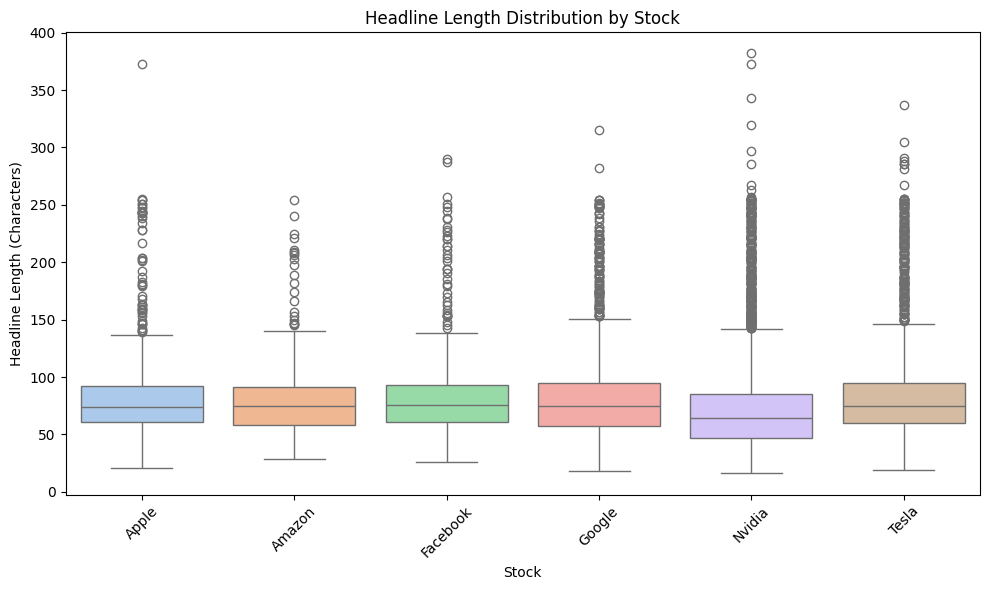

In [10]:


#################
# Calculate headline length
df['headline_length'] = df['headline'].astype(str).apply(len)

# Basic stats
print("\n📊 Overall Headline Length Statistics:")
print(df['headline_length'].describe())

# 🔄 Add stock name mapping (for readability)
stock_names = {
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'GOOG': 'Google',
    'META': 'Facebook',
    'FB': 'Facebook',
    'MSFT': 'Microsoft',
    'NVDA': 'Nvidia',
    'TSLA': 'Tesla'
}
df['stock_name'] = df['stock'].map(stock_names)

# Show average headline length by stock
print("\n📊 Average Headline Length by Stock:")
print(df.groupby('stock_name')['headline_length'].mean().sort_values(ascending=False))

# Optional: Boxplot to visualize distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['stock_name'].notna()], x='stock_name', y='headline_length', palette='pastel')
plt.title("Headline Length Distribution by Stock")
plt.xlabel("Stock")
plt.ylabel("Headline Length (Characters)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

